In [1]:
import pandas as pd
import numpy as np
import math
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [2]:
FIXED_DATA = ['3u_fixed_x_1.txt', '3mf_I=74.9_A=3_f=.5_tot=2.txt']
FLOATING_DATA = ['3ml_I=744.9_r=5000_tot=1.txt', '3ml_I=744.9_r=5000_tot=1 2.txt']

def load_data(file):
    return pd.read_csv(file, delim_whitespace = True, names=['qpdx', 'qpdy', 'sgx', 'sgy'])

In [3]:
def linear(x, a, b):
    return a*x + b

In [4]:
# Find strain gauge voltage to distance conversion factors kx and ky
# data recorded by hand 
vx = [5.058, 5.076, 5.1, 5.122, 5.15, 5.165, 5.187, 5.215]
x = [10.116, 10.152, 10.2, 10.245, 10.299, 10.331, 10.375, 10.431]
popt, perr, redchisq = utils.fit_model(vx, x, [5e-4]*len(vx), (2, 0), linear)
#print(redchisq)
kx = popt[0]
ekx = perr[0]

vy = [4.992, 5.012, 5.029, 5.055, 5.084, 5.109, 5.123, 5.139]
y = [9.985, 10.024, 10.059, 10.111, 10.168, 10.219, 10.247, 10.278]
popt, perr, redchisq = utils.fit_model(vy, y, [5e-4]*len(vx), (2, 0), linear)
#print(redchisq)
ky = popt[0]
eky = perr[0]

print(kx, ekx, ky, eky)

2.00649763858 0.00344812153631 1.99847730238 0.0034832531991


236.319486099
[-0.05602023  0.29465132]


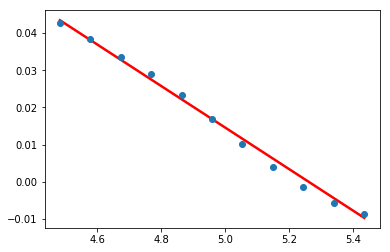

In [32]:
# Find qpd voltage to distance conversion factors qx and qy as functions of laser power

floating_data = load_data('opttrap/' + FIXED_DATA[0])
floating_data['bin'] = pd.cut(floating_data['sgx'], bins=100)
#print(floating_data.info())

meanbin = floating_data.groupby('bin').mean()
stdbin = floating_data.groupby('bin').std()/1000**.5 # TODO: discuss if this is an accurate description of error
#print(meanbin.info())

SG1 = 42
SG2 = 53

popt, perr, redchisq = utils.fit_model(meanbin['sgx'][SG1:SG2], meanbin['qpdx'][SG1:SG2], stdbin['qpdx'][SG1:SG2], (-1, 10), linear)
print(redchisq)
print(popt)

utils.plot_data(meanbin['sgx'][SG1:SG2], meanbin['qpdx'][SG1:SG2], stdbin['qpdx'][SG1:SG2])
utils.plot_model(meanbin['sgx'][SG1:SG2], linear, popt, 'r', '')
plt.show()